In [235]:
### import Liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

## neural network library
from keras.models import Sequential
from keras.layers import Dense, Dropout
from mlxtend.plotting import plot_confusion_matrix


In [135]:
## Load dataset
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [136]:
###  Data Analysis 
### Check for any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [137]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<AxesSubplot:>

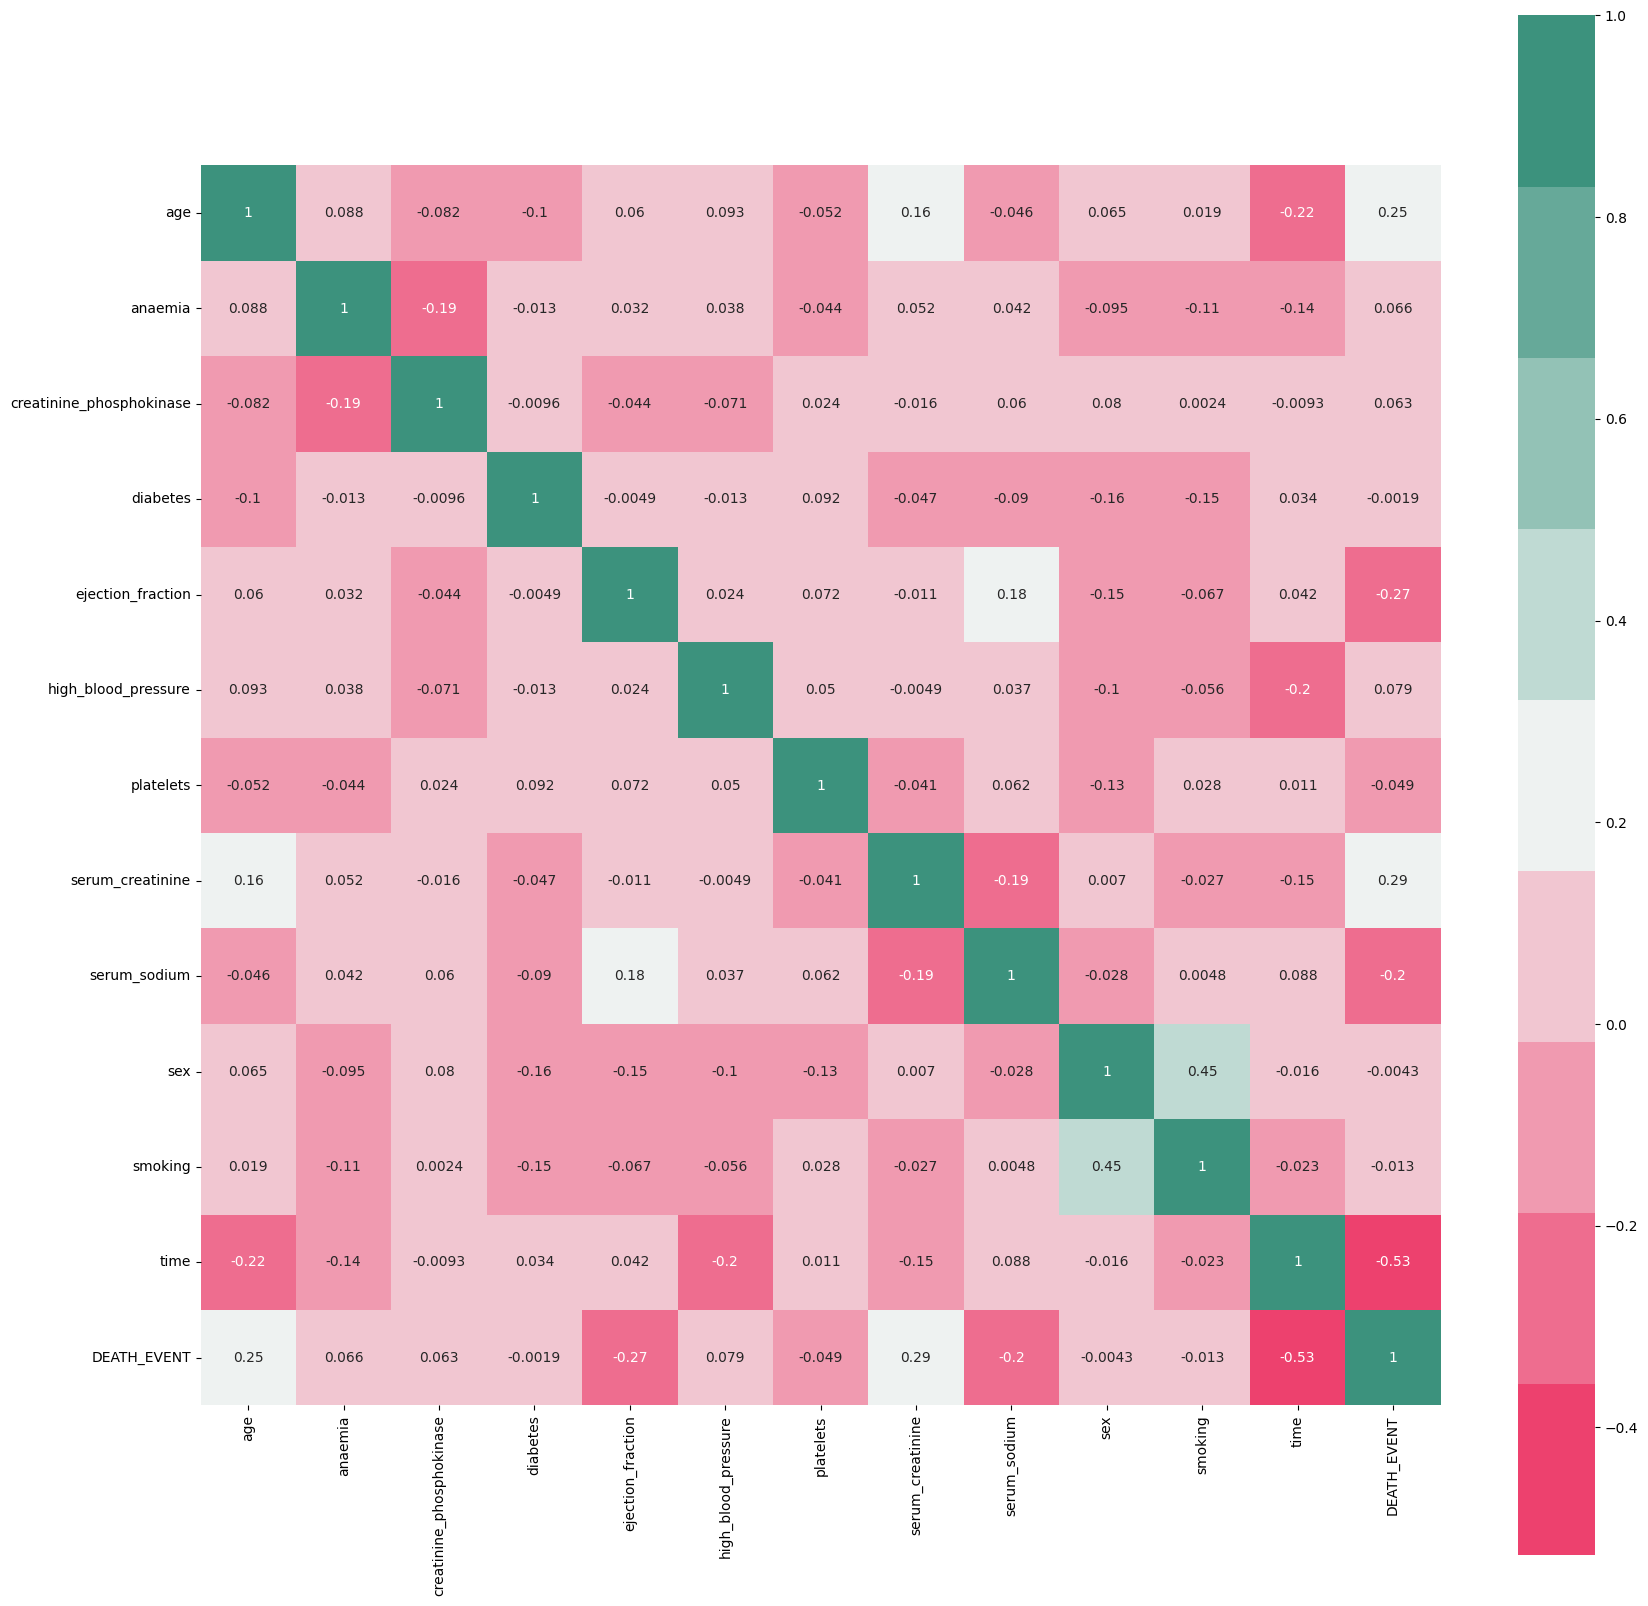

In [236]:
cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
corrmat = df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [139]:
df['diabetes'].value_counts()
###  174 non-diabetic while 125 diabetic

0    174
1    125
Name: diabetes, dtype: int64

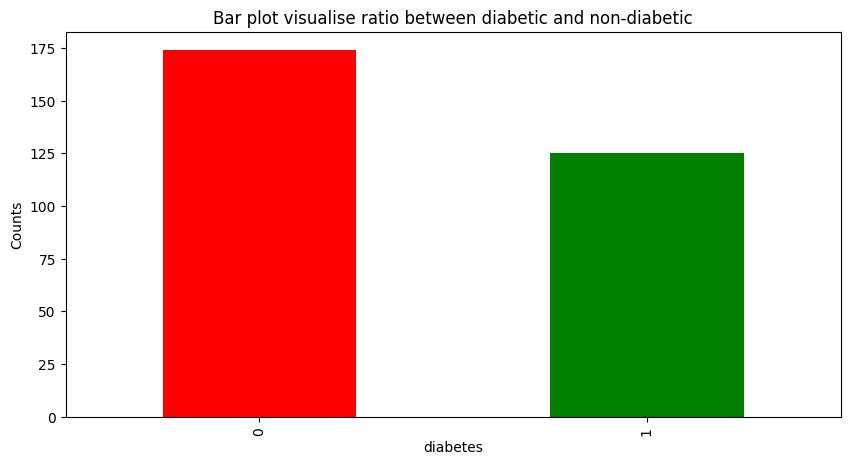

In [140]:
### exploring the data with data visulaization
plt.figure(figsize=(10,5))
df['diabetes'].value_counts().plot(kind="bar", color = ['red','green'])
plt.xlabel('diabetes')
plt.ylabel('Counts')
plt.title("Bar plot visualise ratio between diabetic and non-diabetic")
plt.show()

In [141]:
df['DEATH_EVENT'].value_counts()
### outof 299 there are 96 death event during follow up period.

0    203
1     96
Name: DEATH_EVENT, dtype: int64

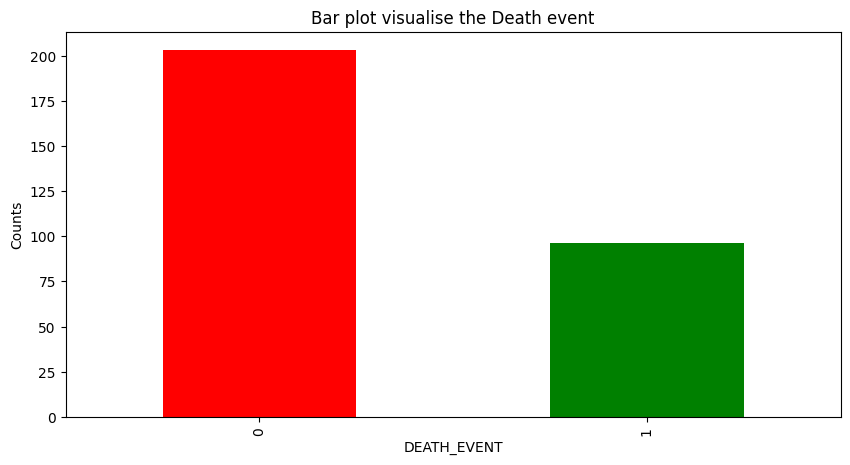

In [142]:
plt.figure(figsize=(10,5))
df['DEATH_EVENT'].value_counts().plot(kind="bar", color = ['red','green'])
plt.xlabel('DEATH_EVENT')
plt.ylabel('Counts')
plt.title("Bar plot visualise the Death event")
plt.show()

In [143]:
df['high_blood_pressure'].value_counts()
### out of 299 there are 105 patients with high_blood_pressure

0    194
1    105
Name: high_blood_pressure, dtype: int64

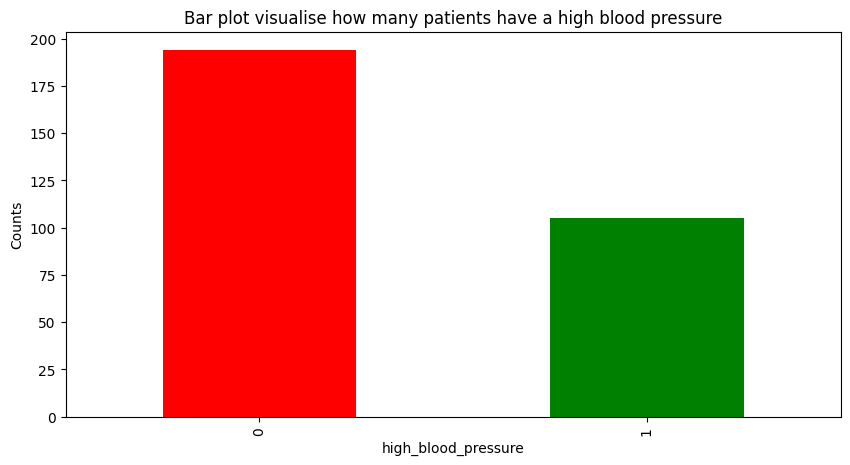

In [144]:
plt.figure(figsize=(10,5))
df['high_blood_pressure'].value_counts().plot(kind="bar", color = ['red','green'])
plt.xlabel('high_blood_pressure')
plt.ylabel('Counts')
plt.title("Bar plot visualise how many patients have a high blood pressure")
plt.show()

In [245]:
df['anaemia'].value_counts()
### outof 299 there are 129 patients are anaemic

0    170
1    129
Name: anaemia, dtype: int64

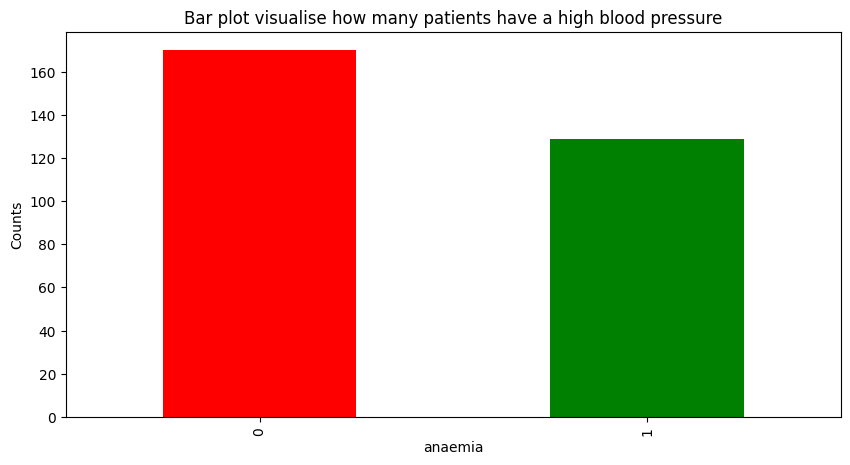

In [244]:
plt.figure(figsize=(10,5))
df['anaemia'].value_counts().plot(kind="bar", color = ['red','green'])
plt.xlabel('anaemia')
plt.ylabel('Counts')
plt.title("Bar plot visualise how many patients are anaemic")
plt.show()

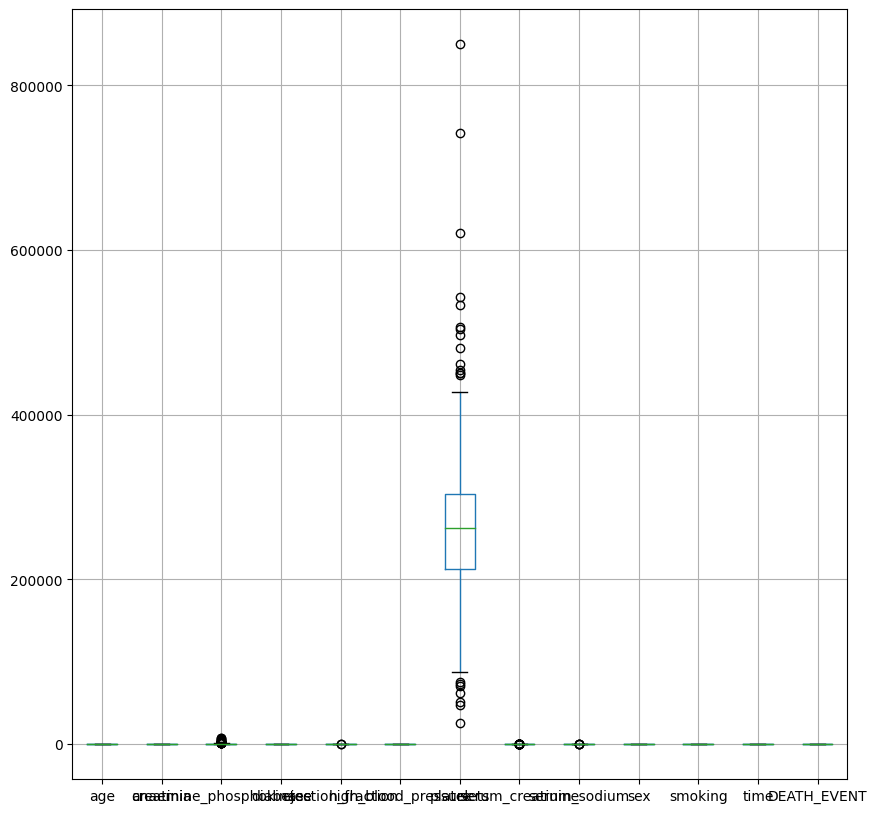

In [248]:
### Check for any potential outliers
df.boxplot(figsize=(10,10))
plt.show()

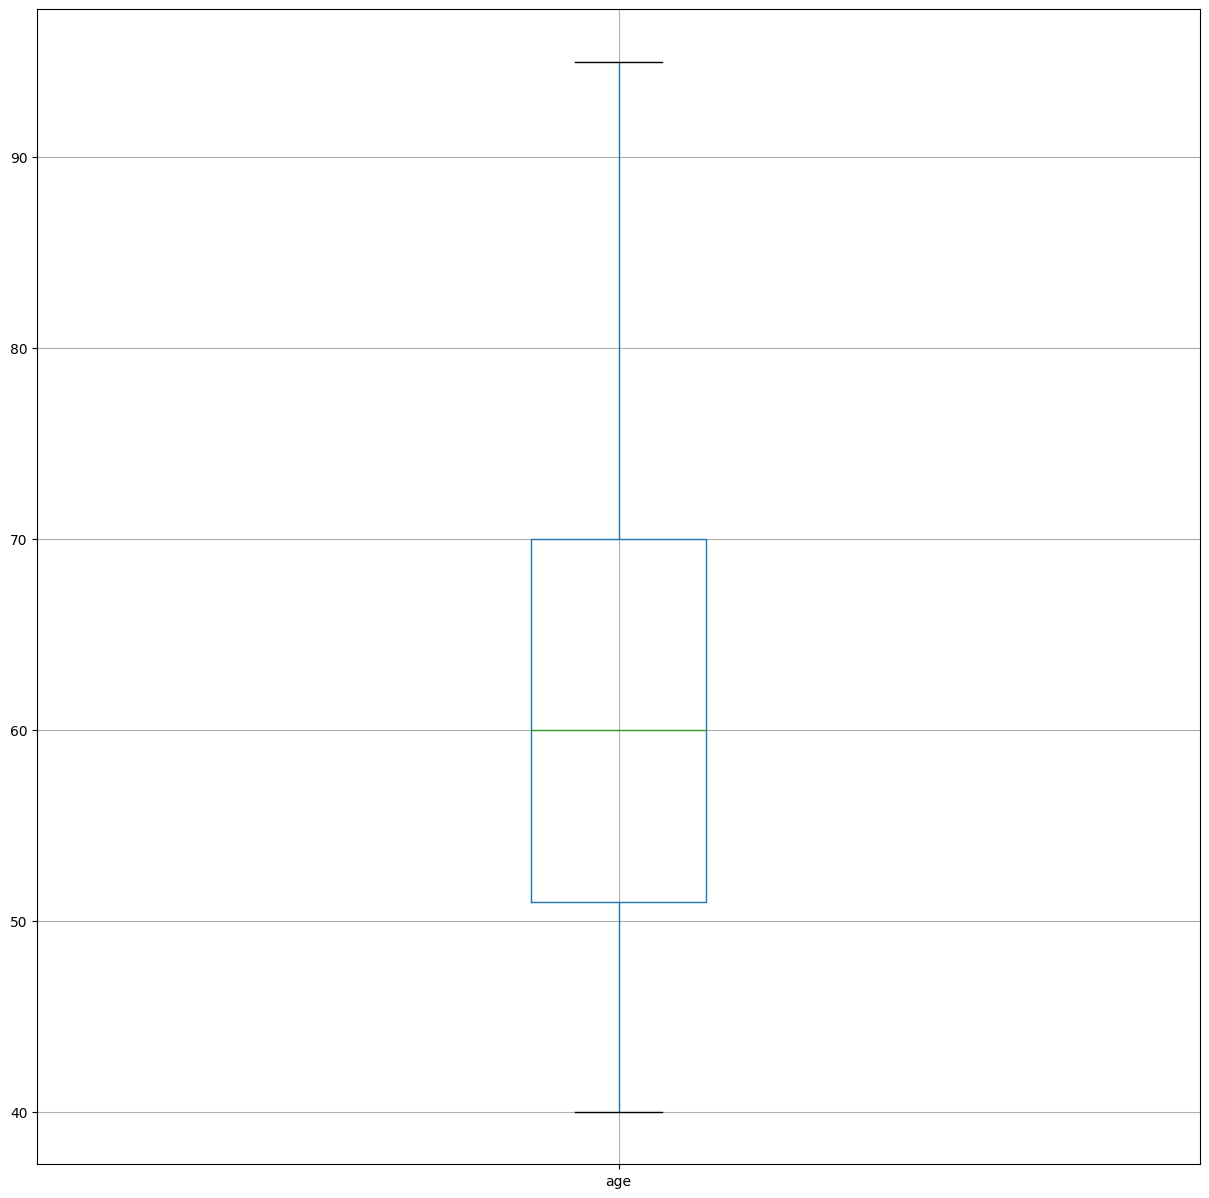

In [145]:
### Check for any potential outliers
df.boxplot('age', figsize=(15,15))
plt.show()


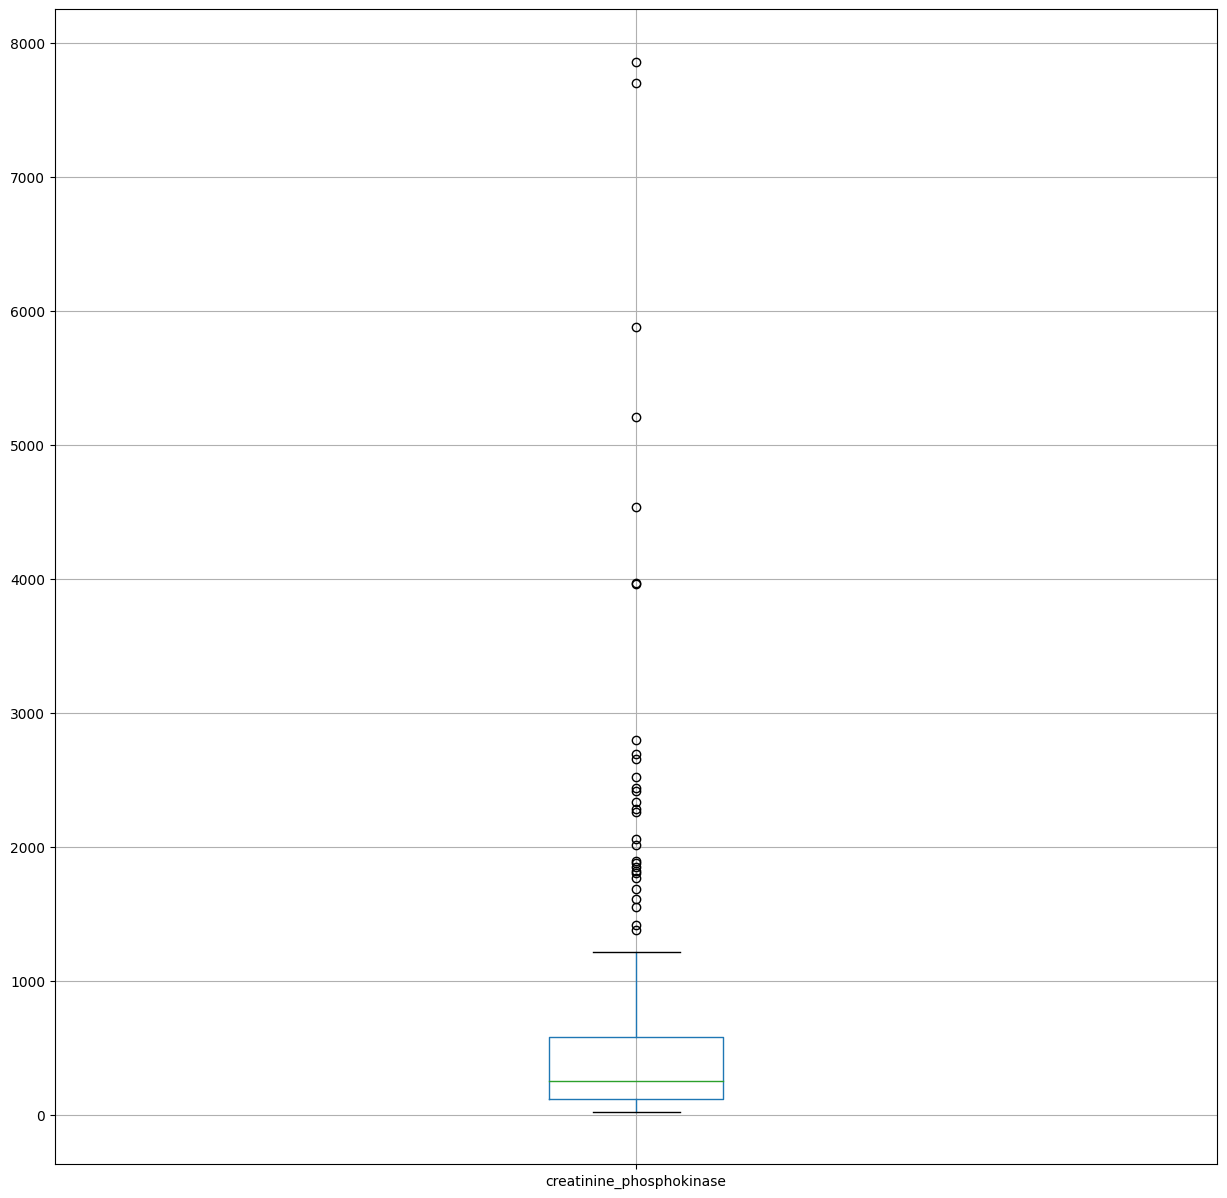

In [146]:
df.boxplot('creatinine_phosphokinase', figsize=(15,15))
plt.show()

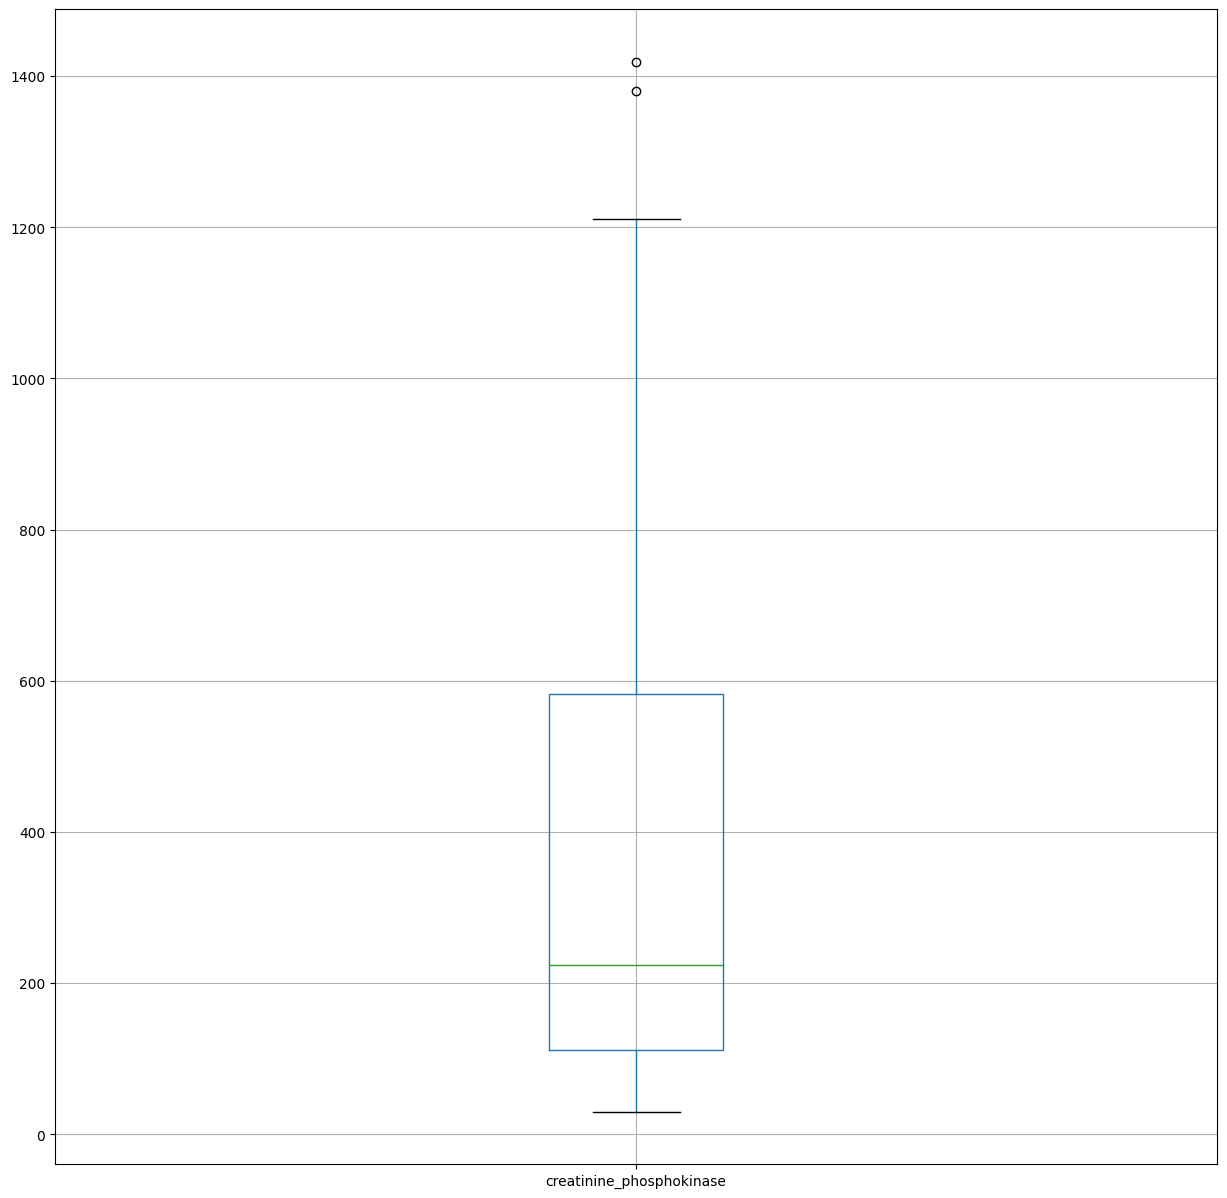

In [170]:
## removing outlier for creatinine_phosphokinase
max_threshold, min_threshold = df['creatinine_phosphokinase'].quantile([0.91,0])
df_new = df[(df.creatinine_phosphokinase> min_threshold)&(df.creatinine_phosphokinase< max_threshold)]
df_new.boxplot('creatinine_phosphokinase', figsize=(15,15))
plt.show()

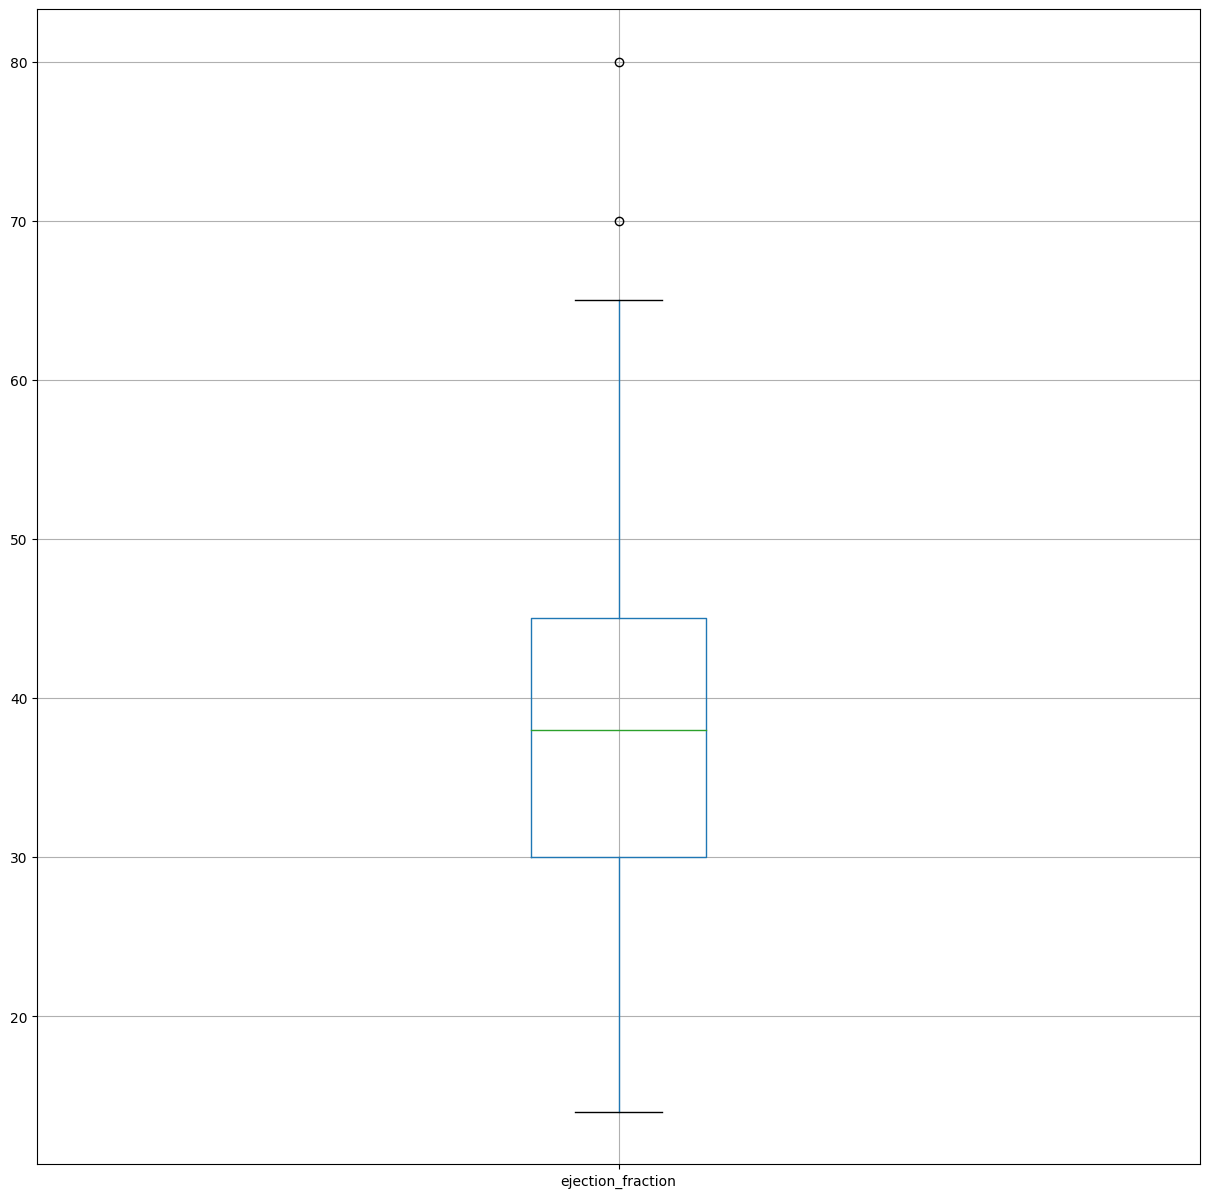

In [148]:
df.boxplot('ejection_fraction', figsize=(15,15))
plt.show()

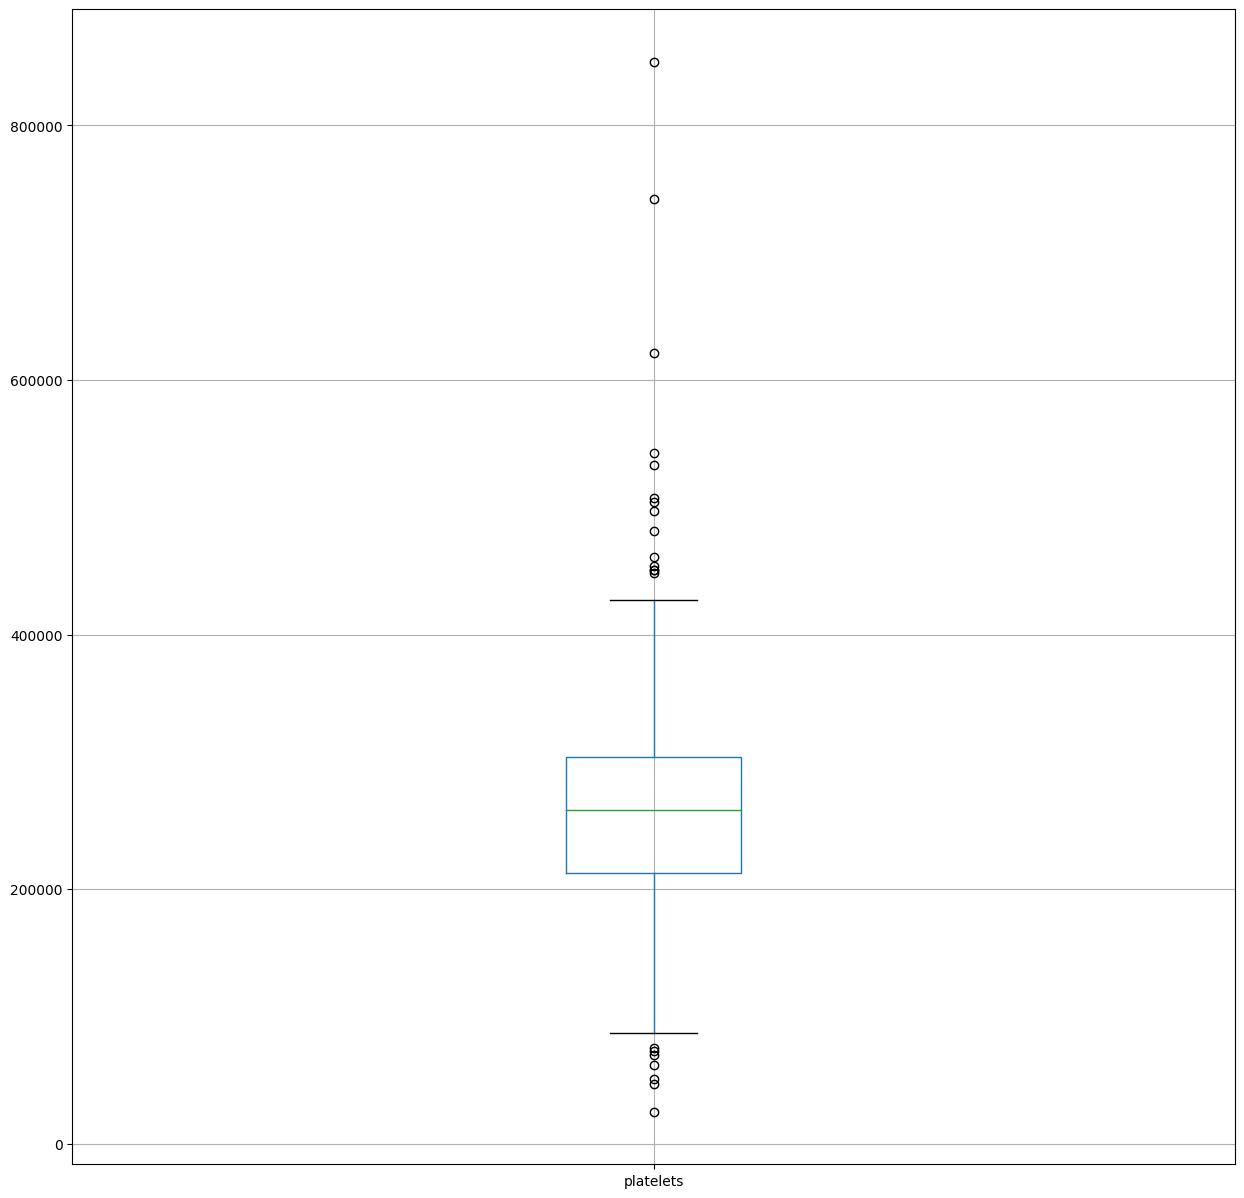

In [149]:
df.boxplot('platelets', figsize=(15,15))
plt.show()

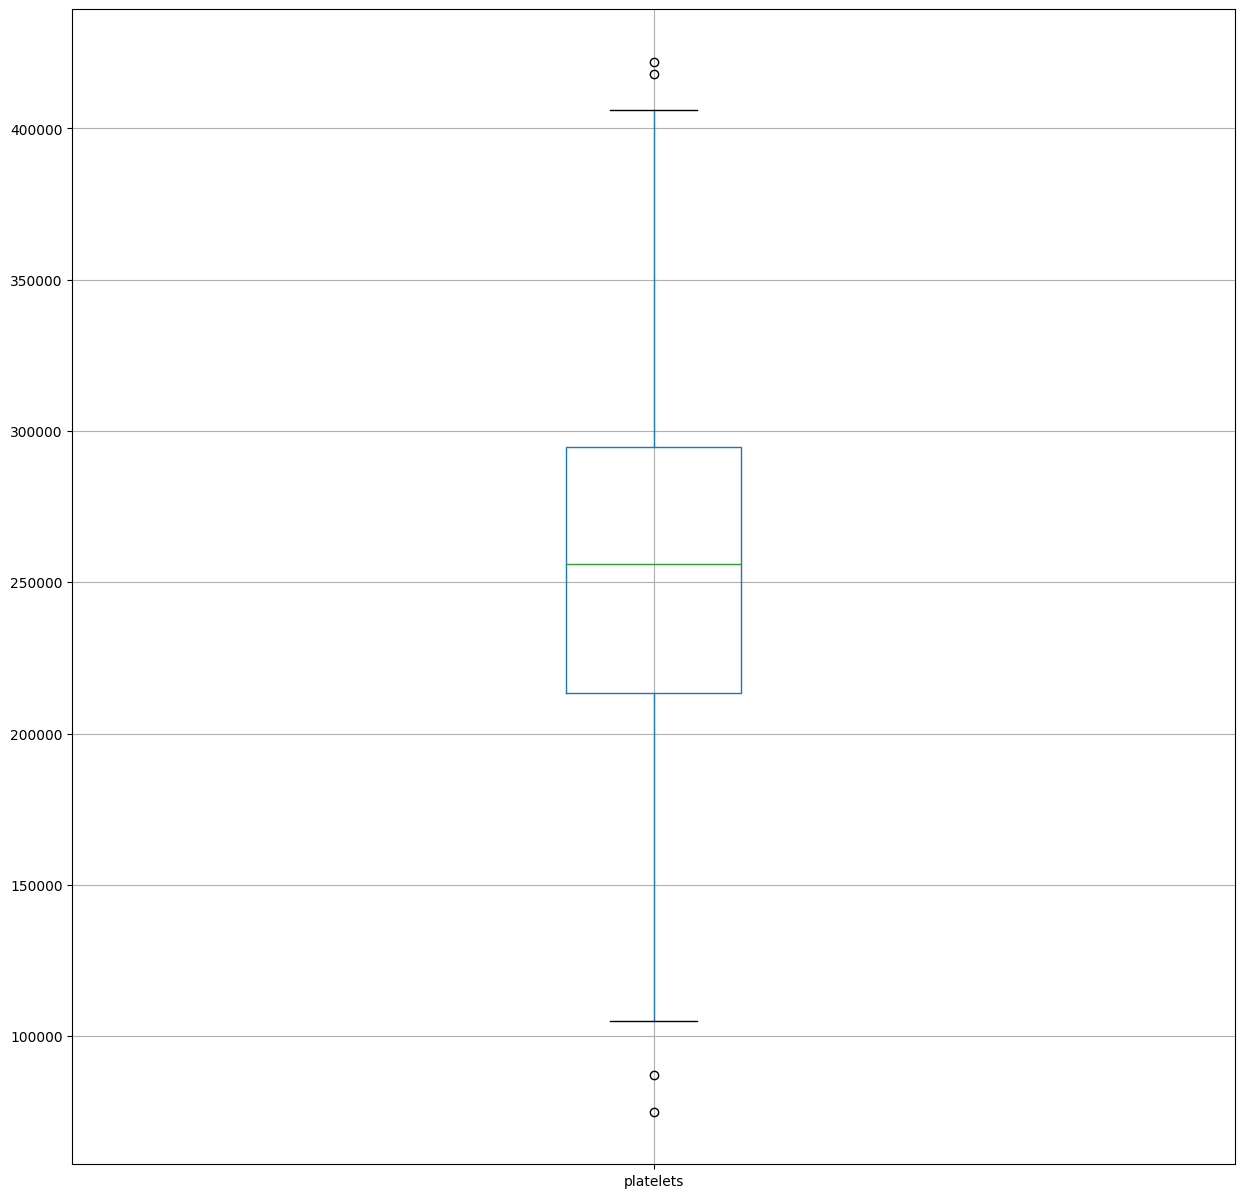

In [171]:
## removing outlier for platelets
max_threshold, min_threshold = df['platelets'].quantile([0.95,0.02])
df_new = df[(df.platelets> min_threshold)&(df.platelets< max_threshold)]
df_new.boxplot('platelets', figsize=(15,15))
plt.show()

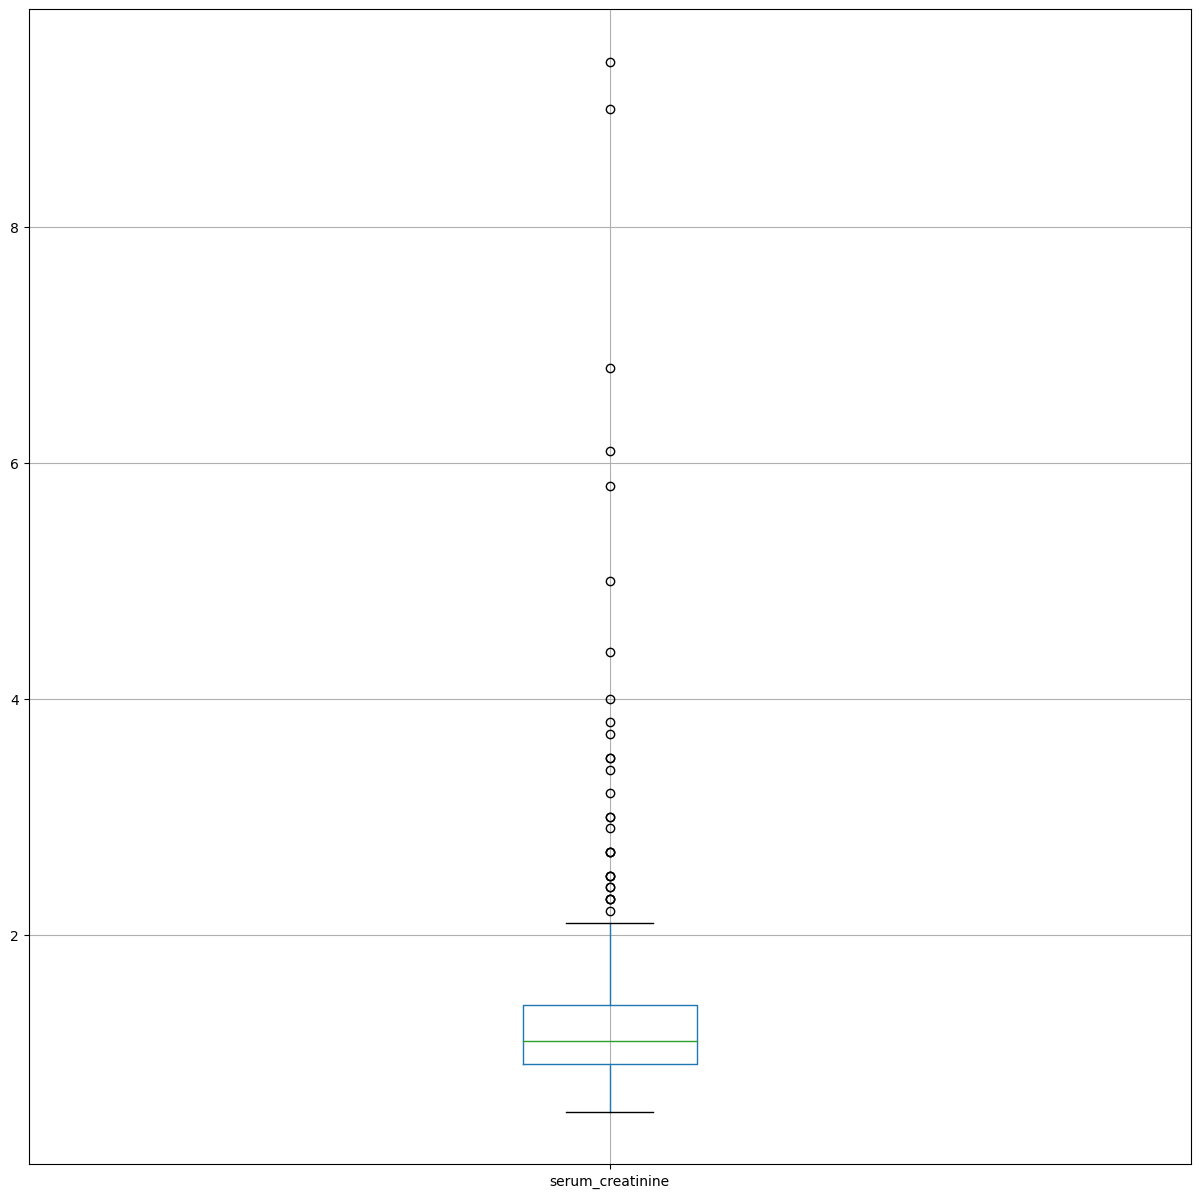

In [151]:
df.boxplot('serum_creatinine', figsize=(15,15))
plt.show()

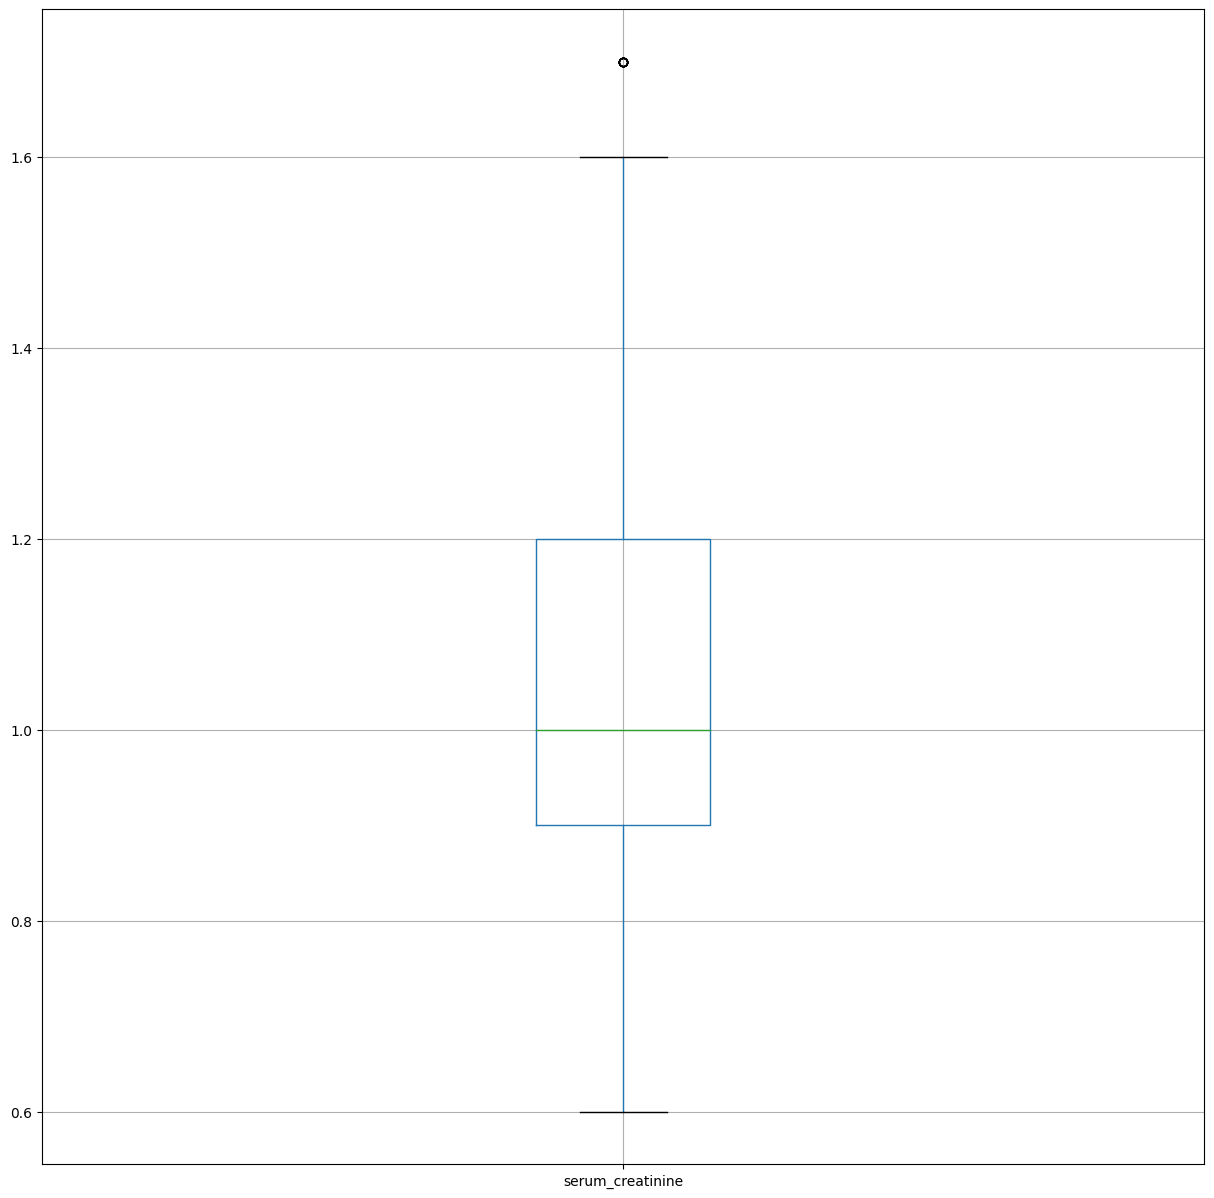

In [172]:
## removing outlier for serum_creatinine
max_threshold, min_threshold = df['serum_creatinine'].quantile([0.83,0.0])
df_new = df[(df.serum_creatinine> min_threshold)&(df.serum_creatinine< max_threshold)]
df_new.boxplot('serum_creatinine', figsize=(15,15))
plt.show()

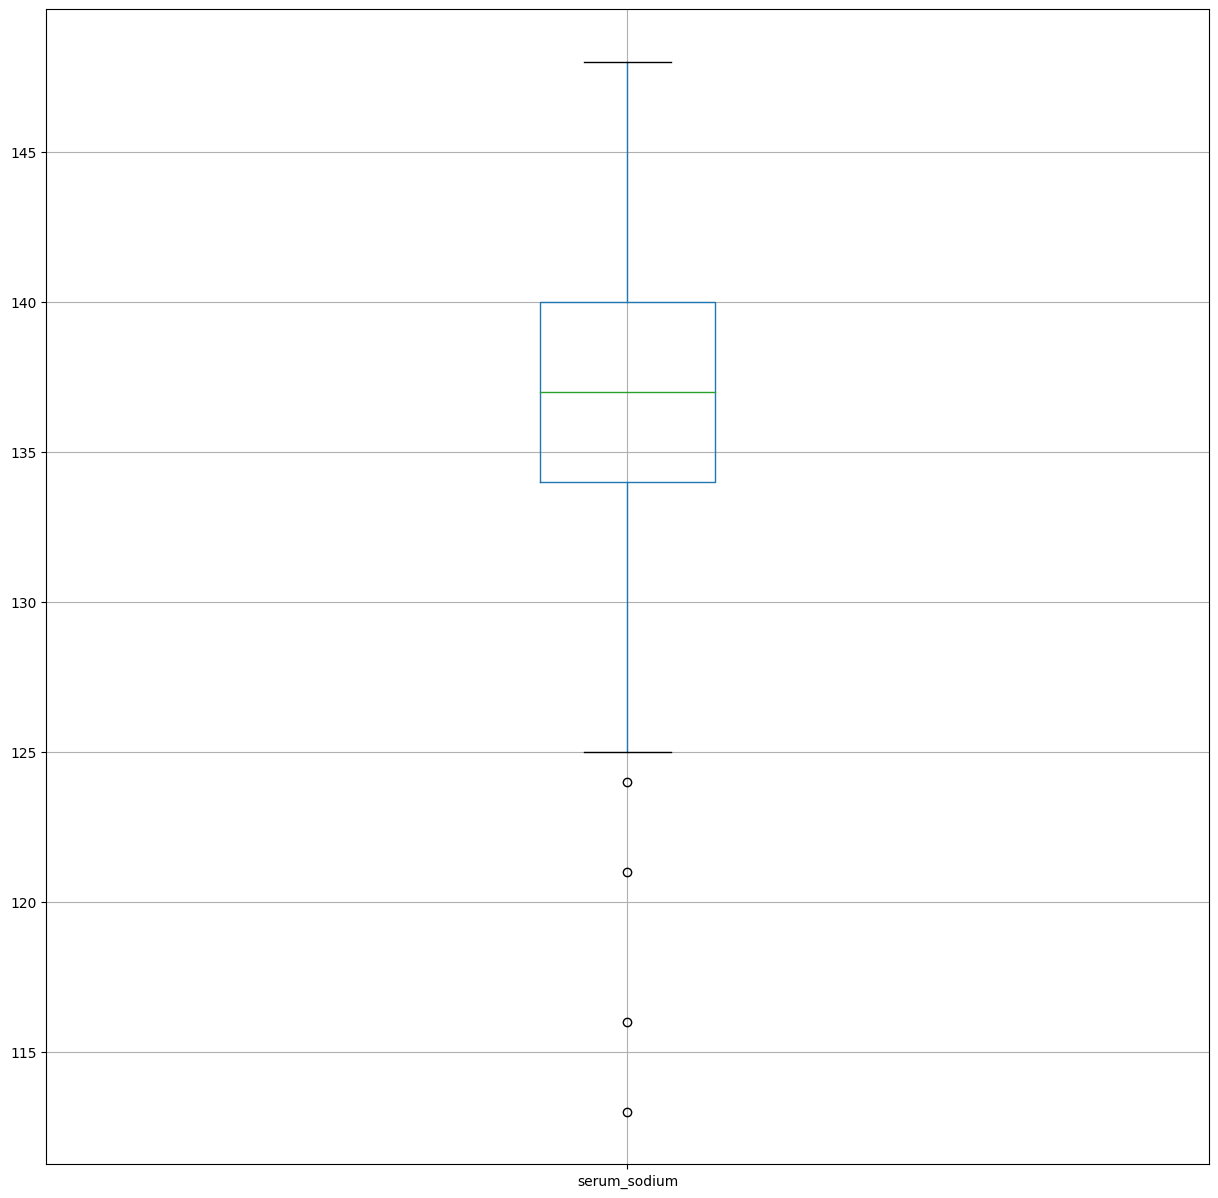

In [153]:
df.boxplot('serum_sodium', figsize=(15,15))
plt.show()

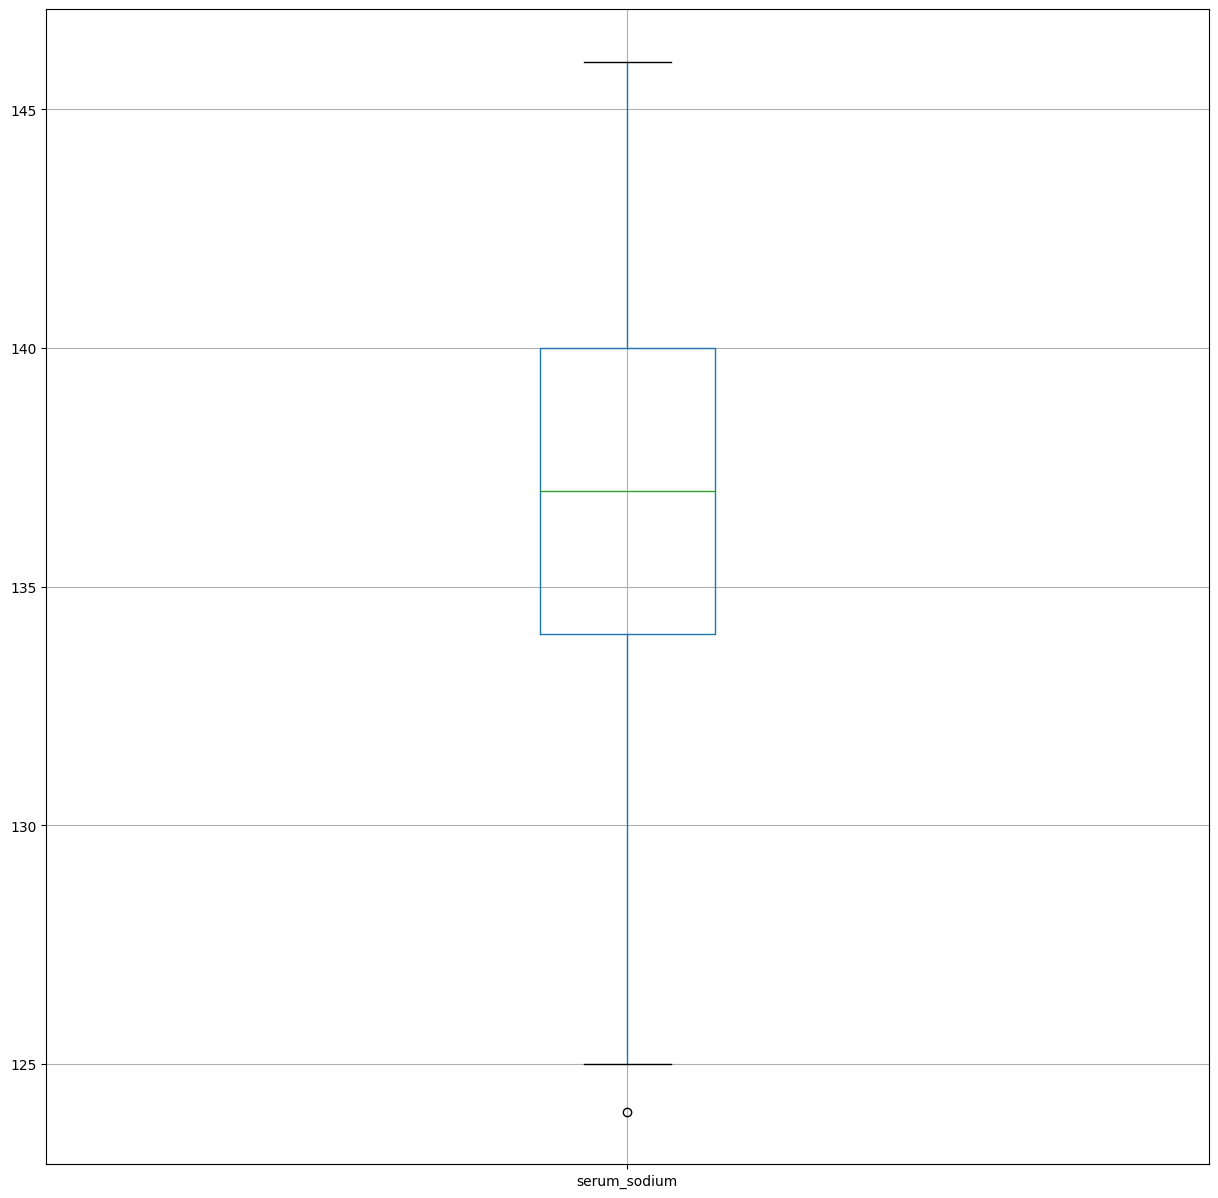

In [173]:
## removing outlier for serum_sodium
max_threshold, min_threshold = df['serum_sodium'].quantile([1,0.01])
df_new = df[(df.serum_sodium> min_threshold)&(df.serum_sodium< max_threshold)]
df_new.boxplot('serum_sodium', figsize=(15,15))
plt.show()

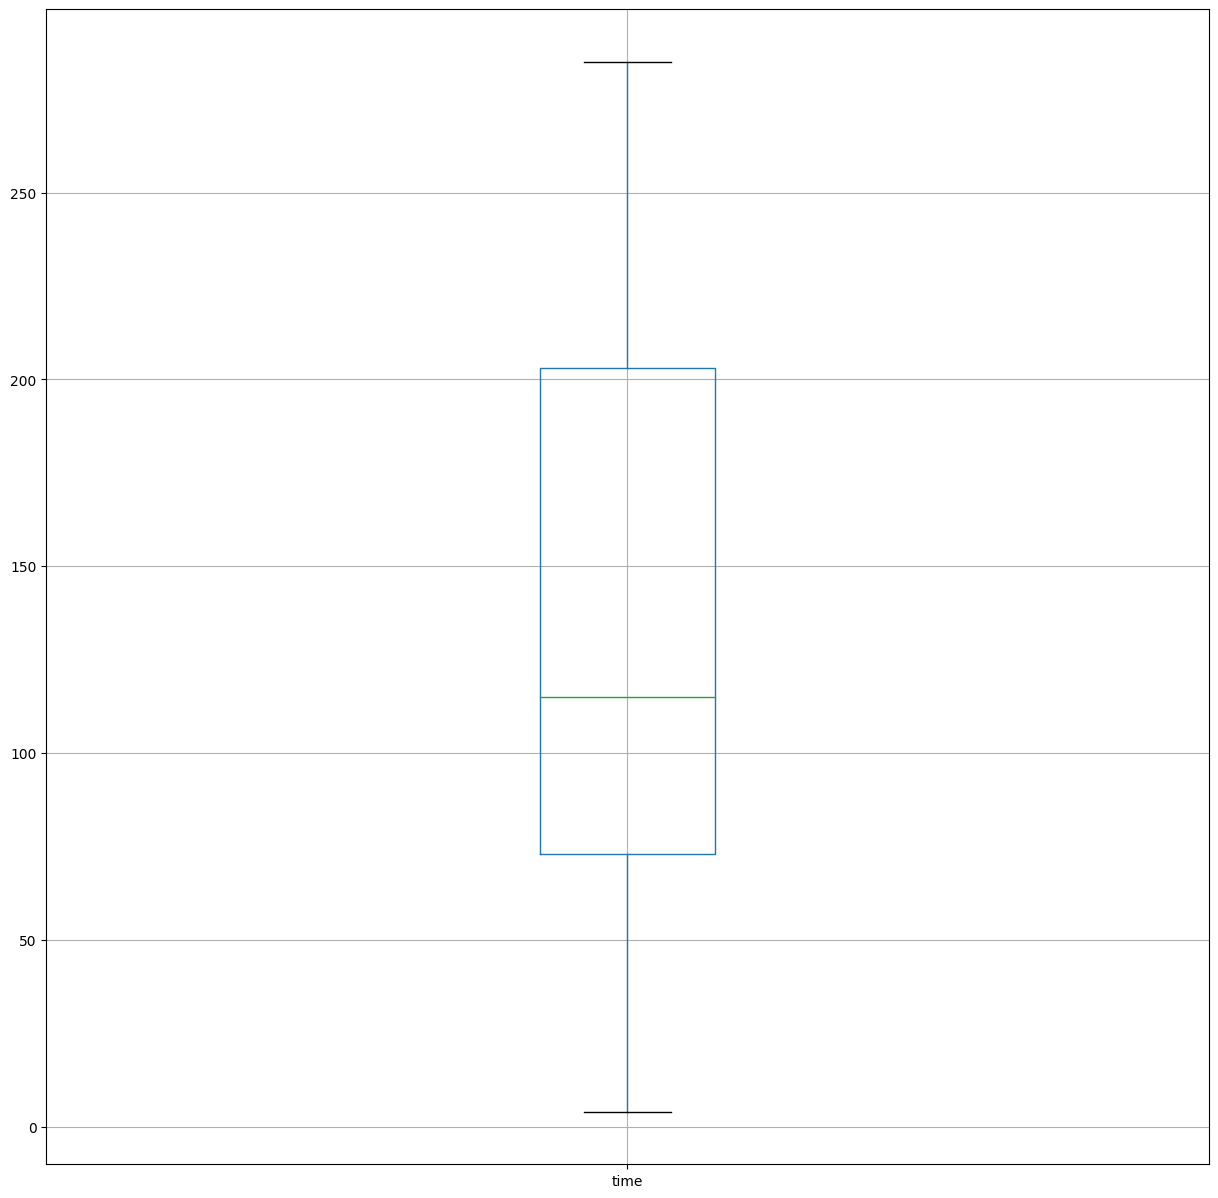

In [155]:
df.boxplot('time', figsize=(15,15))
plt.show()

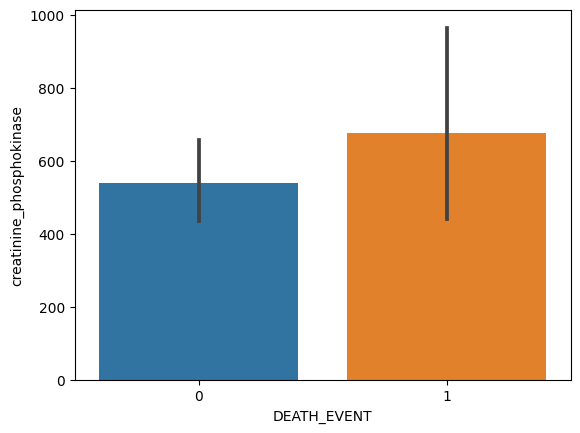

In [174]:
sns.barplot (x='DEATH_EVENT', y='creatinine_phosphokinase', data = df_new)
plt.show()
### Patients with higher CPK enzyme in their blood have higher chance to die

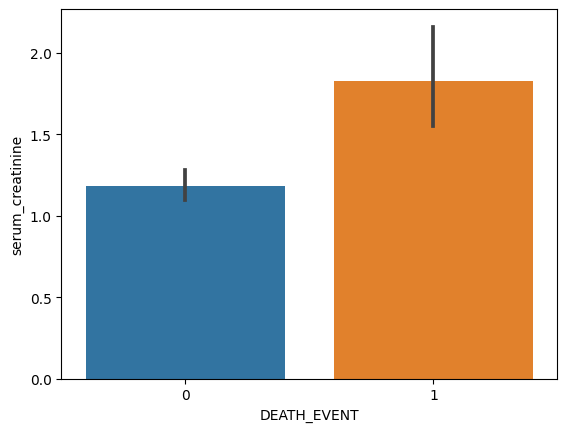

In [175]:
sns.barplot (x='DEATH_EVENT', y='serum_creatinine', data = df_new)
plt.show()
### Patients with higher level of serum creatinine in their blood have higher chance to die

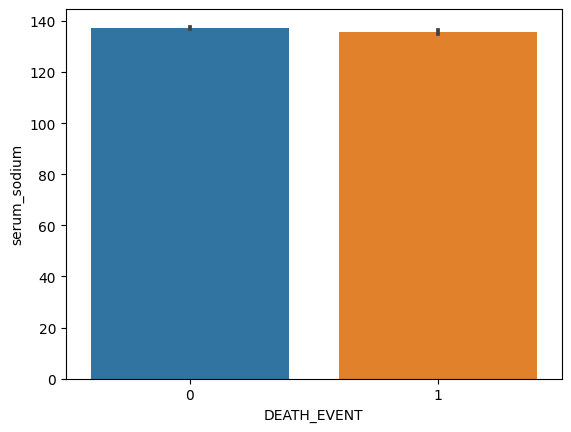

In [176]:
sns.barplot (x='DEATH_EVENT', y='serum_sodium', data = df_new)
plt.show()
### The level of serum sodium in the blood has no corellation with death events

In [249]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       295 non-null    float64
 1   anaemia                   295 non-null    int64  
 2   creatinine_phosphokinase  295 non-null    int64  
 3   diabetes                  295 non-null    int64  
 4   ejection_fraction         295 non-null    int64  
 5   high_blood_pressure       295 non-null    int64  
 6   platelets                 295 non-null    float64
 7   serum_creatinine          295 non-null    float64
 8   serum_sodium              295 non-null    int64  
 9   sex                       295 non-null    int64  
 10  smoking                   295 non-null    int64  
 11  time                      295 non-null    int64  
 12  DEATH_EVENT               295 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 32.3 KB


/var/folders/wz/fr6fh3zj7pv4nntlp9gbztzw0000gn/T/ipykernel_32135/545705814.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_new["serum_creatinine"][df_new.DEATH_EVENT == 1], color="darkturquoise", shade=True)
/var/folders/wz/fr6fh3zj7pv4nntlp9gbztzw0000gn/T/ipykernel_32135/545705814.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_new["serum_creatinine"][df_new.DEATH_EVENT  == 0], color="yellow", shade=True)


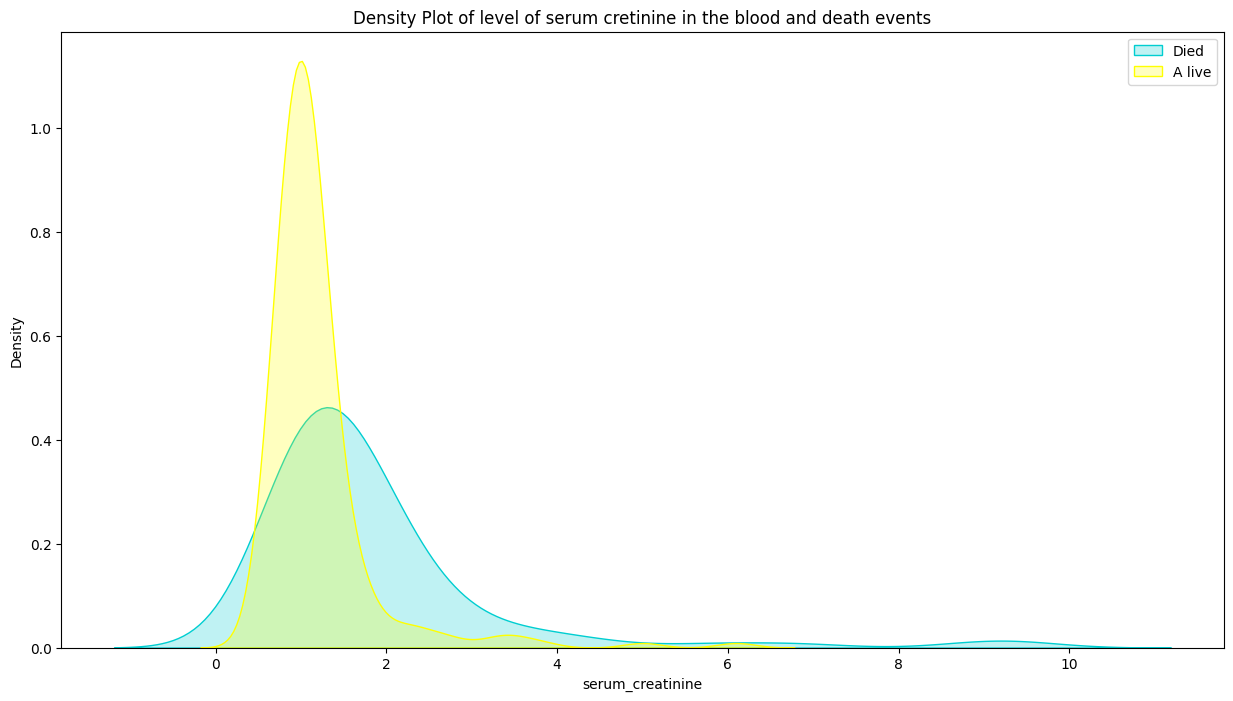

In [178]:
### Explore the relation between Serum creatinine and the death events
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_new["serum_creatinine"][df_new.DEATH_EVENT == 1], color="darkturquoise", shade=True)
sns.kdeplot(df_new["serum_creatinine"][df_new.DEATH_EVENT  == 0], color="yellow", shade=True)
plt.legend(['Died', 'A live'])
plt.title('Density Plot of level of serum cretinine in the blood and death events')
ax.set(xlabel='serum_creatinine')
plt.show()

In [161]:
### The chance of death_event is higher when the level of serum creatinine in the blood is above 2 mg/dl.

In [182]:
#### Select variables (X and Y)
x = df_new.drop(["DEATH_EVENT"],axis=1)
y= df_new["DEATH_EVENT"]

In [183]:
### train, test, split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 101)

In [185]:
### setting up standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [187]:
### K-Nearest Neighbors ###

Knn_model = KNeighborsClassifier(n_neighbors=5)
###train KNN model
Knn_model.fit(x_train, y_train)


KNeighborsClassifier()

In [188]:
### Make prediction
y_pred_knn = Knn_model.predict(x_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})

,Actual,Predicted
149,0,0
83,0,0
293,0,0
271,0,0
169,0,0
...,...,...
158,0,1
260,0,0
59,1,1
39,1,0


In [189]:
## Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)


print(accuracy_knn)
print(conf_mat_knn)

0.7191011235955056
[[55  6]
 [19  9]]


In [190]:

### Decision tree classifier ###
Decision_tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=4, min_samples_leaf=5) 
Decision_tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=4, min_samples_leaf=5) 
Decision_tree_max_depth = DecisionTreeClassifier(max_depth=4)


In [191]:
### train Classification model 
Decision_tree_gini.fit(x_train,y_train)
Decision_tree_entropy.fit(x_train,y_train)
Decision_tree_max_depth.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=4)

In [233]:
## make prediction
y_pred_gini = Decision_tree_gini.predict(x_test)
y_pred_entropy = Decision_tree_entropy.predict(x_test)
y_pred_depth = Decision_tree_max_depth.predict(x_test)

In [241]:
## Classification Model Evaluataion  (gini)
accuracy_gini = accuracy_score(y_test, y_pred_gini)
conf_mat_gini = confusion_matrix(y_test, y_pred_gini)
print(accuracy_gini)
print(conf_mat_gini)
## Classification Model Evaluataion  (entropy)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
conf_mat_entropy = confusion_matrix(y_test, y_pred_entropy)
print(accuracy_entropy)
print(conf_mat_entropy)
## Classification Model Evaluataion (max_depth)
accuracy_max_depth = accuracy_score(y_test, y_pred_depth)
conf_mat_max_depth = confusion_matrix(y_test, y_pred_depth)
print(accuracy_max_depth)
print(conf_mat_max_depth)


0.797752808988764
[[53  8]
 [10 18]]
0.7865168539325843
[[51 10]
 [ 9 19]]
0.8089887640449438
[[54  7]
 [10 18]]


In [250]:
## Train models Artificial Neural Network 
## initialise the ANN
model = Sequential()

##set up the layers
## input layer
model.add(Dense(units= 15, kernel_initializer= 'uniform', activation = 'relu', input_dim = 12))
## hidden layer
model.add(Dense(units= 5, kernel_initializer= 'uniform', activation = 'relu'))
##regularization
model.add(Dropout(0.2))
##output layer
model.add(Dense(units= 1, kernel_initializer= 'uniform', activation = 'sigmoid'))

## compiling the ANN

model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])


In [251]:
## train the ANN model
history = model.fit(x_train, y_train, batch_size = 20, epochs = 100, validation_split= 0.30)

Epoch 1/100
8/8 [==============================] - 4s 73ms/step - loss: 0.6924 - accuracy: 0.6806 - val_loss: 0.6917 - val_accuracy: 0.6452
Epoch 2/100
8/8 [==============================] - 0s 29ms/step - loss: 0.6904 - accuracy: 0.6944 - val_loss: 0.6902 - val_accuracy: 0.6452
Epoch 3/100
8/8 [==============================] - 0s 17ms/step - loss: 0.6884 - accuracy: 0.6944 - val_loss: 0.6884 - val_accuracy: 0.6452
Epoch 4/100
8/8 [==============================] - 0s 20ms/step - loss: 0.6863 - accuracy: 0.6944 - val_loss: 0.6867 - val_accuracy: 0.6452
Epoch 5/100
8/8 [==============================] - 0s 16ms/step - loss: 0.6839 - accuracy: 0.6944 - val_loss: 0.6845 - val_accuracy: 0.6452
Epoch 6/100
8/8 [==============================] - 0s 16ms/step - loss: 0.6803 - accuracy: 0.6944 - val_loss: 0.6817 - val_accuracy: 0.6452
Epoch 7/100
8/8 [==============================] - 0s 37ms/step - loss: 0.6768 - accuracy: 0.6944 - val_loss: 0.6779 - val_accuracy: 0.6452
Epoch 8/100
8/8 [===

In [252]:
### Make Prediction
y_pred_ann = model.predict(x_test)
y_pred_ann = np.where(y_pred_ann > 0.5, 1, 0)

3/3 [==============================] - 0s 24ms/step


In [253]:
print(y_test.shape)
print(y_pred_ann.shape)

(89,)
(89, 1)


In [254]:
y_pred_ann = y_pred_ann.flatten()
print(y_test.shape)
print(y_pred_ann.shape)

(89,)
(89,)


In [255]:
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        61
           1       0.64      0.57      0.60        28

    accuracy                           0.76        89
   macro avg       0.73      0.71      0.72        89
weighted avg       0.76      0.76      0.76        89



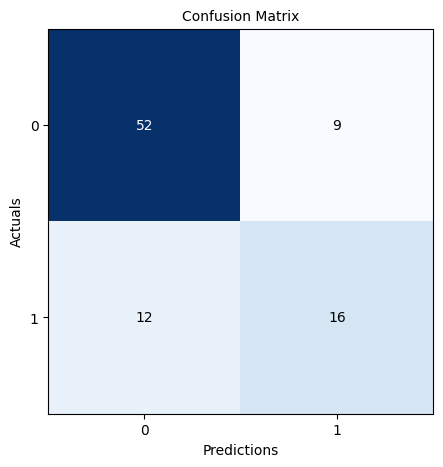

In [256]:
### plot a confusion matrix

cm = confusion_matrix(y_test, y_pred_ann)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5, 5))
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [257]:
###  Area under curve (AUC)
AUC = roc_auc_score(y_test, y_pred_ann)
print('AUC: %f' %AUC)

AUC: 0.711944


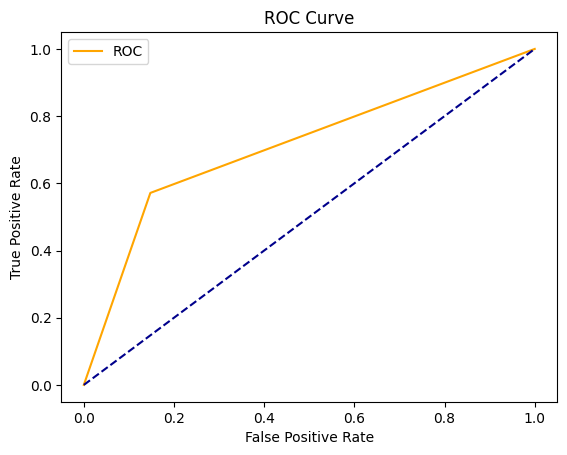

In [258]:
FPR, TPR = roc_curve(y_test, y_pred_ann)[0:2]

plt.plot(FPR, TPR, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [231]:
## save the ann model
model.save('ANN_model')

INFO:tensorflow:Assets written to: ANN_model/assets


INFO:tensorflow:Assets written to: ANN_model/assets
